In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
X_train = pd.read_csv('dengue_features_train_cleaned.csv')
y_train = pd.read_csv('dengue_labels_train.csv')

In [3]:
X_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.131490,0.127823,0.203130,0.201963,45.702091,298.697750,299.221723,295.244555,...,40.125594,82.173009,45.702091,16.744659,4.900618,27.181438,8.095505,32.446497,22.098043,39.362294
std,5.408314,15.019437,0.137272,0.119478,0.073781,0.083491,43.651356,1.359878,1.260384,1.525955,...,43.313117,7.152190,43.651356,1.540958,3.542762,1.281116,2.127521,1.959090,1.570524,47.285701
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.037400,0.048092,0.154057,0.144455,9.785000,297.657857,298.257143,294.117857,...,13.200000,77.196429,9.785000,15.554643,2.328571,26.314286,6.528571,31.100000,21.100000,8.850000
50%,2002.000000,26.500000,0.115550,0.115926,0.195664,0.190121,38.320000,298.640000,299.285714,295.638571,...,27.300000,80.287857,38.320000,17.084286,2.857143,27.400000,7.350000,32.800000,22.200000,24.050000
75%,2005.000000,39.250000,0.231443,0.213429,0.247461,0.246579,70.227500,299.827500,300.207143,296.457857,...,52.200000,86.437500,70.227500,17.976071,7.632143,28.130804,9.603571,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


<AxesSubplot:>

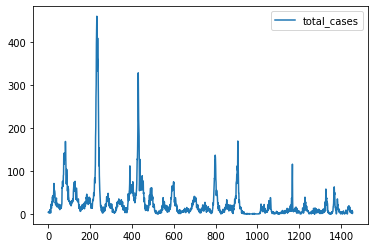

In [4]:
y_train.plot(y='total_cases')

Can see that the number of cases spikes periodically, and at quite extreme levels. Check the mean and median number of weekly cases

c:\Users\ongwe\Documents\NUS\NUS\Econs\EC4308\proj\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

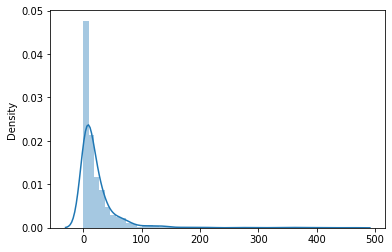

In [5]:
sns.distplot(x=y_train.total_cases,)

In [6]:
print('mean weekly cases =', y_train.total_cases.mean())
print('median weekly cases =', y_train.total_cases.median())
print('mode weekly cases =', y_train.total_cases.mode())

mean weekly cases = 24.67513736263736
median weekly cases = 12.0
mode weekly cases = 0    0
dtype: int64


Can also see from the below plot that the surge in cases tend to happen in the 2nd half of the year.

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

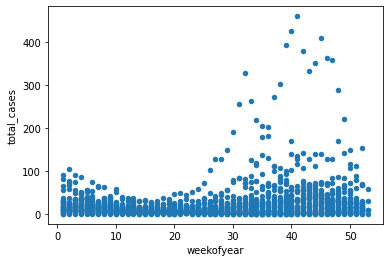

In [7]:
y_train.plot(x='weekofyear', y='total_cases', kind='scatter')

In [8]:
df = pd.concat([X_train, y_train.drop(columns=['city', 'year', 'weekofyear'])], axis=1)
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30/04/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07/05/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14/05/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21/05/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28/05/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,28/05/2010,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,04/06/2010,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,11/06/2010,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,18/06/2010,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


Preliminary check to see correlation of features with label

In [34]:
X_train.corrwith(y_train.total_cases)

year                                    -0.306806
weekofyear                               0.216452
ndvi_ne                                 -0.241376
ndvi_nw                                 -0.202235
ndvi_se                                 -0.168612
ndvi_sw                                 -0.196461
precipitation_amt_mm                    -0.038740
reanalysis_air_temp_k                    0.264952
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_max_air_temp_k               -0.191345
reanalysis_min_air_temp_k                0.325252
reanalysis_precip_amt_kg_per_m2         -0.010031
reanalysis_relative_humidity_percent    -0.132452
reanalysis_sat_precip_amt_mm            -0.038740
reanalysis_specific_humidity_g_per_kg    0.129861
reanalysis_tdtr_k                       -0.278483
station_avg_temp_c                       0.116109
station_diur_temp_rng_c                 -0.237844
station_max_temp_c                      -0.039219


<AxesSubplot:ylabel='total_cases'>

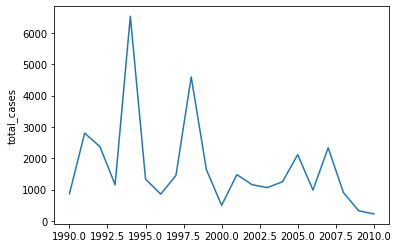

In [130]:
sns.lineplot(x=y_train.year.unique(), y=y_train.groupby(['year']).total_cases.sum())

Quick visual above to see the number of cases over the years

<AxesSubplot:>

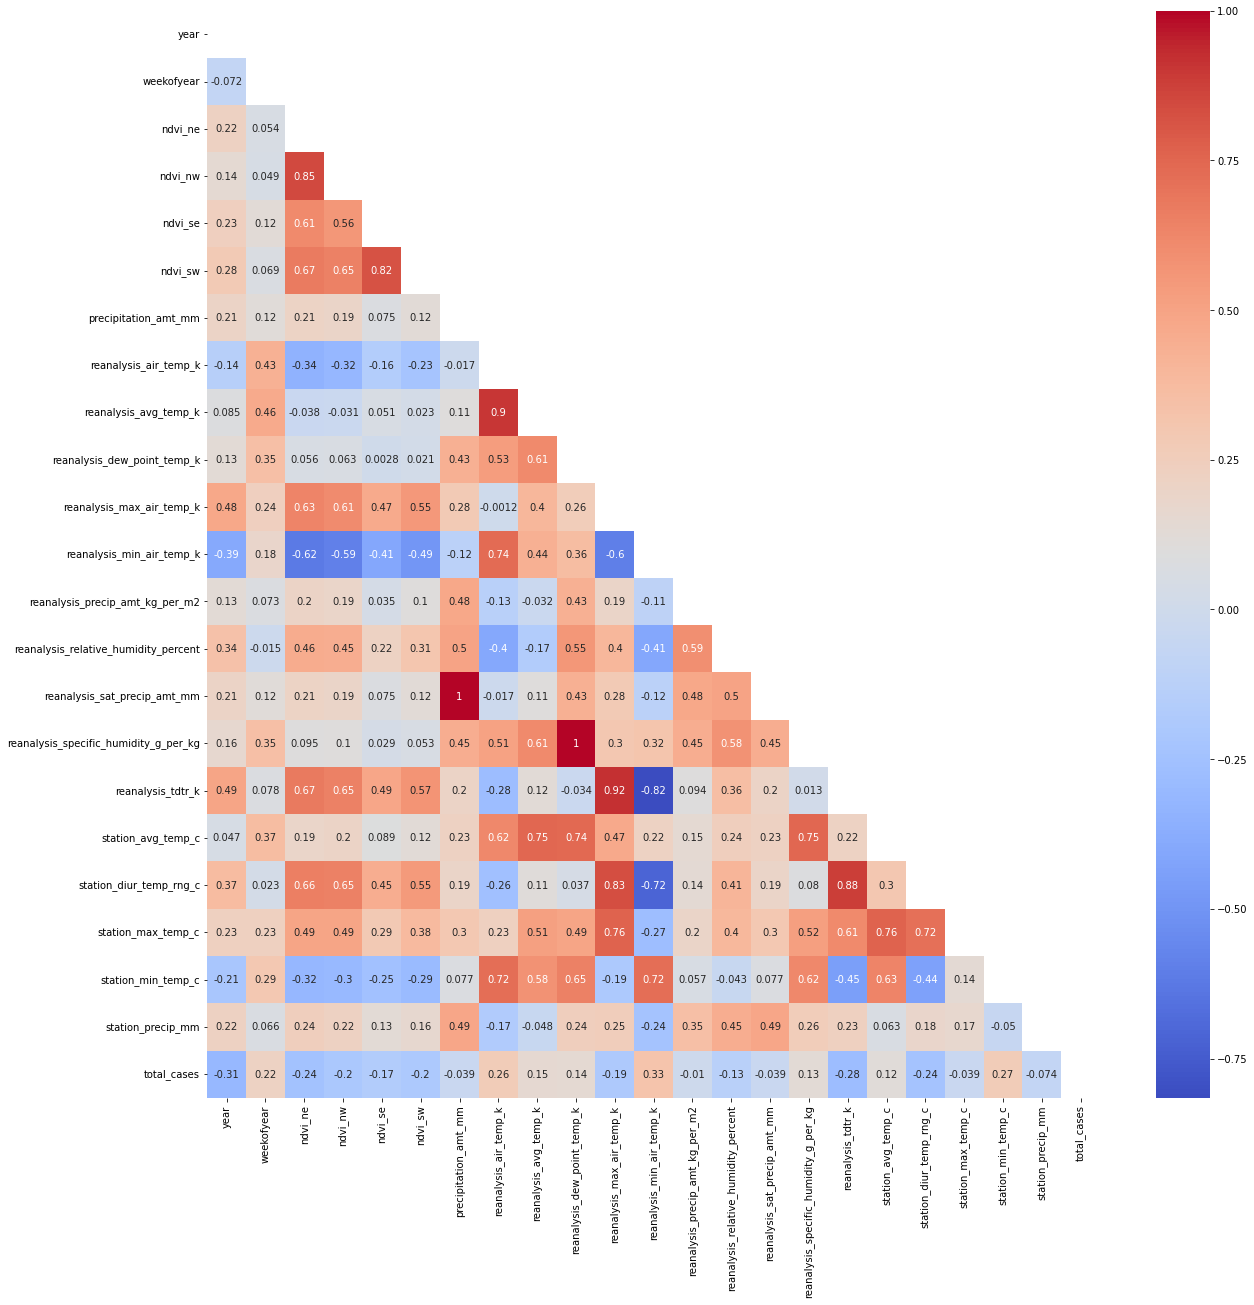

In [98]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm', annot=True, mask=mask)
# corr.style.background_gradient()

Correlation heatmap to understand how features are correlated with the total cases and also the correlation of features with one another. Some features seem to be highly correlated to one another.

# Data cleaning
Check for missing values first and decide what to do

In [54]:
df.apply(lambda y: y.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [72]:
df[df.isnull().any(axis=1)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city,year,weekofyear,total_cases
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,2.100000,28.114286,6.942857,34.4,23.9,39.1,sj,1990,23,2
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,2.014286,28.328571,6.514286,33.9,24.4,1.1,sj,1990,27,6
13,sj,1990,31,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,299.862857,...,2.585714,28.242857,8.085714,34.4,22.8,37.6,sj,1990,31,17
14,sj,1990,32,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,300.391429,...,2.328571,28.200000,7.557143,33.3,23.3,11.4,sj,1990,32,23
15,sj,1990,33,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,299.958571,...,1.857143,28.042857,6.685714,32.8,22.8,44.7,sj,1990,33,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,iq,2009,23,2009-06-04,0.114000,0.092443,0.097471,0.126286,42.22,296.125714,...,6.071429,28.100000,11.800000,34.0,22.2,NaN,iq,2009,23,3
1409,iq,2009,32,2009-08-06,0.395000,0.352733,0.484286,0.401914,9.79,297.370000,...,11.757143,27.975000,12.100000,35.4,20.5,NaN,iq,2009,32,5
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,iq,2010,53,0
1431,iq,2010,1,2010-01-08,0.124571,0.179129,0.163843,0.135471,27.04,299.264286,...,11.100000,28.600000,12.300000,35.1,21.8,NaN,iq,2010,1,10


257 out of 1456 rows in the training dataset contains missing values

In [74]:
X_test = pd.read_csv('dengue_features_test.csv')
X_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [76]:
X_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [75]:
X_test[X_test.isnull().any(1)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
7,sj,2008,25,2008-06-17,NaN,0.082150,0.144371,0.116729,30.81,300.484286,...,7.20,76.870000,30.81,17.420000,3.900000,28.757143,6.985714,34.4,24.4,0.3
11,sj,2008,29,2008-07-15,NaN,NaN,0.195843,0.176157,4.34,300.448571,...,5.49,77.615714,4.34,17.571429,2.614286,28.785714,5.014286,31.7,26.1,0.0
15,sj,2008,33,2008-08-12,NaN,NaN,0.058900,0.065643,4.28,301.150000,...,7.82,77.968571,4.28,18.418571,2.742857,29.214286,6.342857,33.9,25.0,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,iq,2011,28,2011-07-16,0.330200,0.334843,0.324957,0.319843,19.52,295.554286,...,25.70,88.778571,19.52,14.787143,9.271429,NaN,NaN,31.8,19.5,21.1
318,iq,2011,32,2011-08-13,0.322914,0.334943,0.293471,0.335500,7.30,297.454286,...,79.90,86.355714,7.30,16.032857,11.642857,27.020000,11.560000,34.2,20.4,NaN
339,iq,2012,1,2012-01-08,0.220886,0.235729,0.260271,0.321814,55.26,296.638571,...,140.80,97.435714,55.26,17.765714,5.800000,NaN,NaN,32.8,22.6,35.3
370,iq,2012,32,2012-08-12,0.289500,0.300171,0.239743,0.308771,16.38,297.657143,...,8.90,77.642857,16.38,14.560000,13.114286,27.000000,13.400000,34.2,18.3,NaN


63 out of 416 test data contains missing values